In [1]:
import pandas as pd

# Load the test.csv file into a pandas DataFrame
df = pd.read_csv('/content/test.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Display a summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics of the numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
         id player_id  login_count_1  login_count_2  login_count_3  \
0  ANS00001   P011753      31.222232      41.790417      28.048736   
1  ANS00002   P010021      61.358999      49.209284            NaN   
2  ANS00003   P006725      24.763478      37.723228      26.879628   
3  ANS00004   P018170      82.100747      74.862388      73.520927   
4  ANS00005   P003027      50.901216      70.636572      55.606357   

   login_count_4  login_lat_1  login_lon_1  login_lat_2  login_lon_2  ...  \
0            NaN   -17.074035   127.285635   -17.554811   126.865553  ...   
1            NaN    48.430879    25.555743    48.708993    26.733951  ...   
2      32.503285     8.252684    40.788695     8.346856    40.688039  ...   
3      83.495309   -28.728293   178.990465   -29.104994   178.810800  ...   
4      68.179388   -46.833704   167.886402   -47.372141   166.767058  ...   

   guild_changes_1  guild_changes_2  guild_changes_3  guild_changes_4  \
0           

## Visualize Data Distribution Before Preprocessing




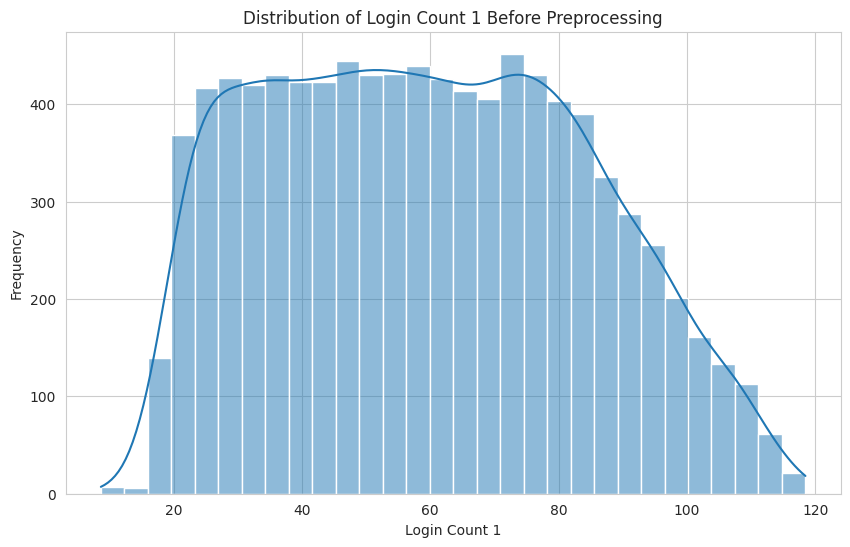

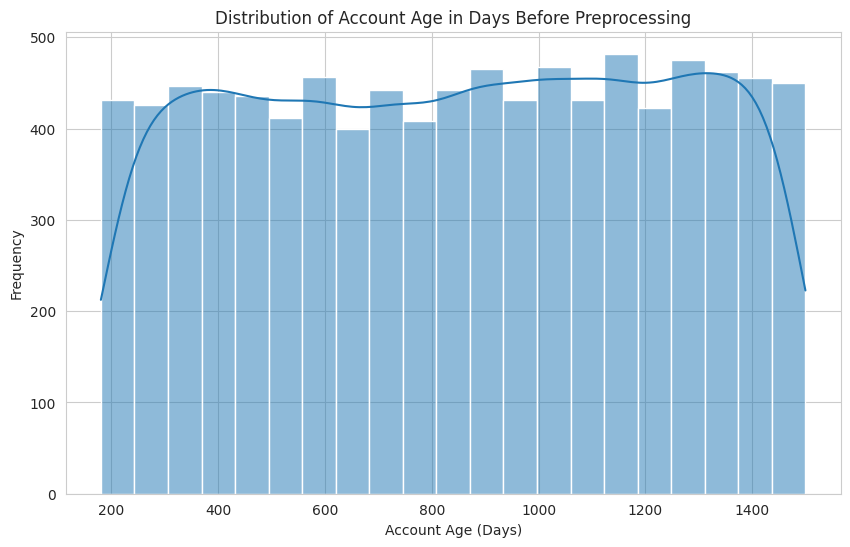

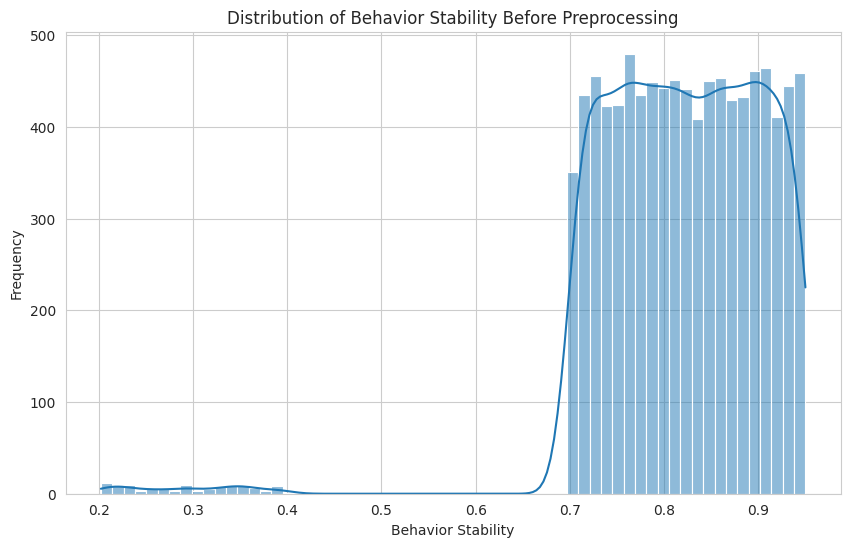

Histograms for login_count_1, account_age_days, and behavior_stability from df_processed generated.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style('whitegrid')

# Recreate df_processed by dropping 'id' and 'player_id' from the original df
df_processed = df.drop(columns=['id', 'player_id'])

# Create histograms for specified columns from df_processed

# Histogram for login_count_1
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['login_count_1'].dropna(), kde=True)
plt.title('Distribution of Login Count 1 Before Preprocessing')
plt.xlabel('Login Count 1')
plt.ylabel('Frequency')
plt.show()

# Histogram for account_age_days
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['account_age_days'].dropna(), kde=True)
plt.title('Distribution of Account Age in Days Before Preprocessing')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for behavior_stability
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['behavior_stability'].dropna(), kde=True)
plt.title('Distribution of Behavior Stability Before Preprocessing')
plt.xlabel('Behavior Stability')
plt.ylabel('Frequency')
plt.show()

print("Histograms for login_count_1, account_age_days, and behavior_stability from df_processed generated.")

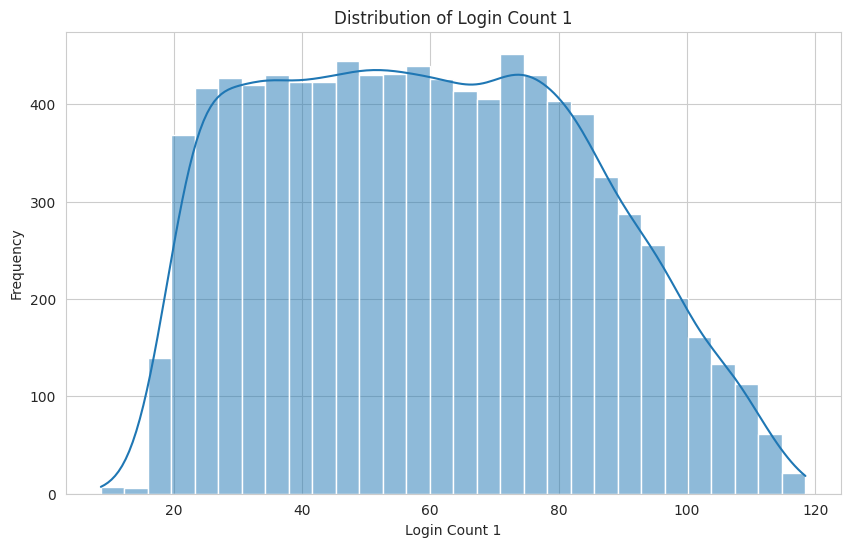

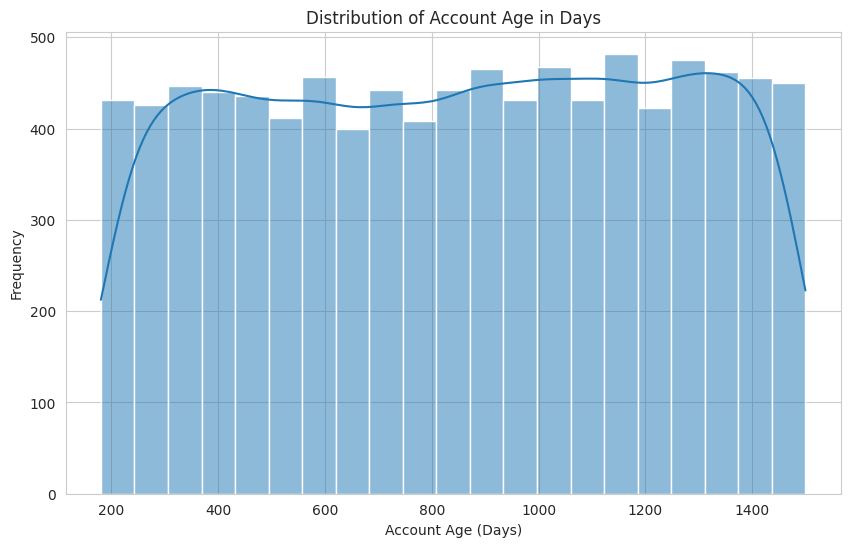

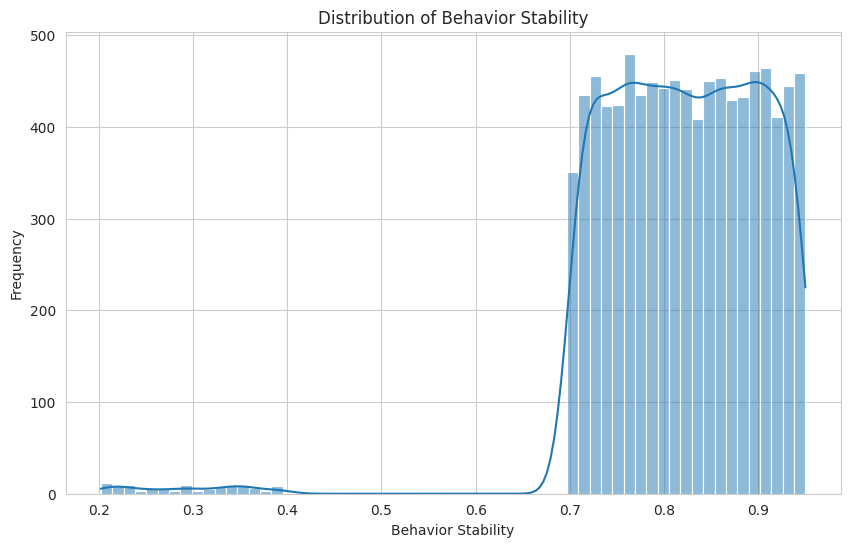

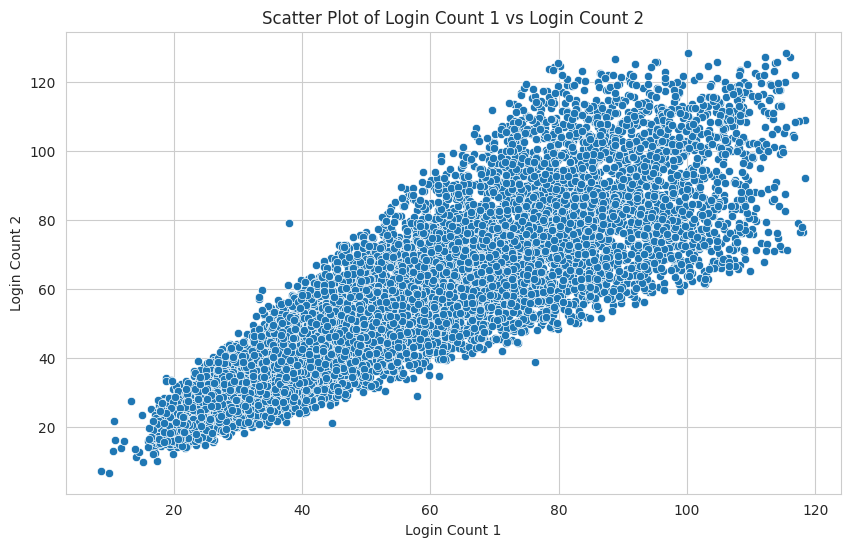

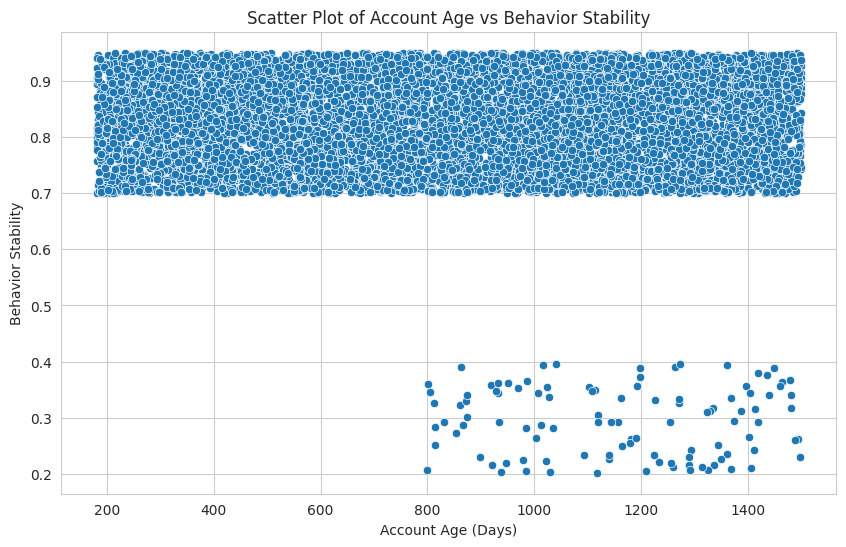

Initial EDA visualizations (histograms and scatter plots) generated.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style('whitegrid')

# 3. Create histograms for specified columns

# Histogram for login_count_1
plt.figure(figsize=(10, 6))
sns.histplot(df['login_count_1'].dropna(), kde=True)
plt.title('Distribution of Login Count 1')
plt.xlabel('Login Count 1')
plt.ylabel('Frequency')
plt.show()

# Histogram for account_age_days
plt.figure(figsize=(10, 6))
sns.histplot(df['account_age_days'].dropna(), kde=True)
plt.title('Distribution of Account Age in Days')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for behavior_stability
plt.figure(figsize=(10, 6))
sns.histplot(df['behavior_stability'].dropna(), kde=True)
plt.title('Distribution of Behavior Stability')
plt.xlabel('Behavior Stability')
plt.ylabel('Frequency')
plt.show()

# 4. Create scatter plot for login_count_1 vs login_count_2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='login_count_1', y='login_count_2', data=df)
plt.title('Scatter Plot of Login Count 1 vs Login Count 2')
plt.xlabel('Login Count 1')
plt.ylabel('Login Count 2')
plt.show()

# 5. Create scatter plot for account_age_days vs behavior_stability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='account_age_days', y='behavior_stability', data=df)
plt.title('Scatter Plot of Account Age vs Behavior Stability')
plt.xlabel('Account Age (Days)')
plt.ylabel('Behavior Stability')
plt.show()

print("Initial EDA visualizations (histograms and scatter plots) generated.")

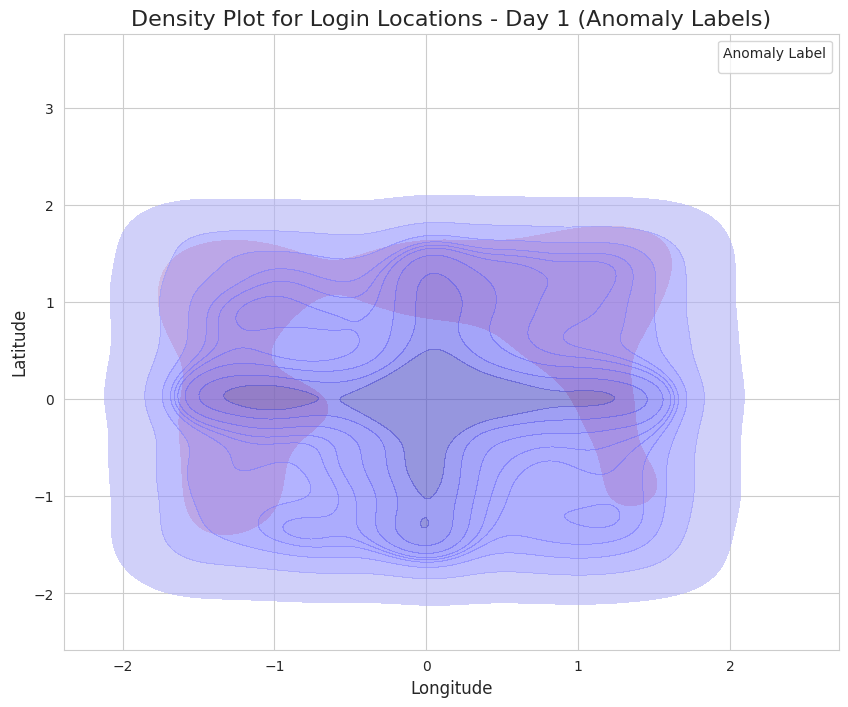

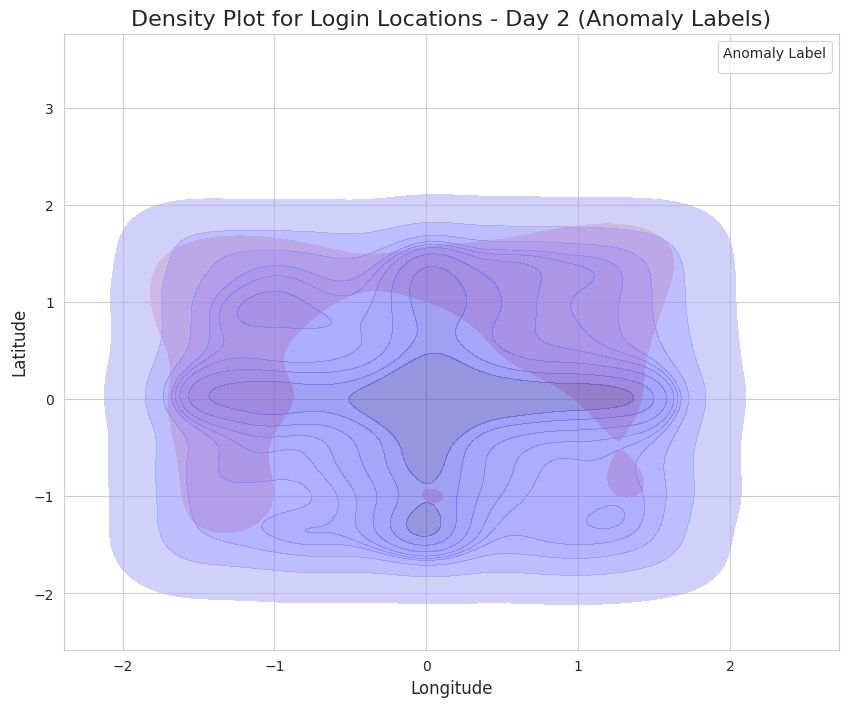

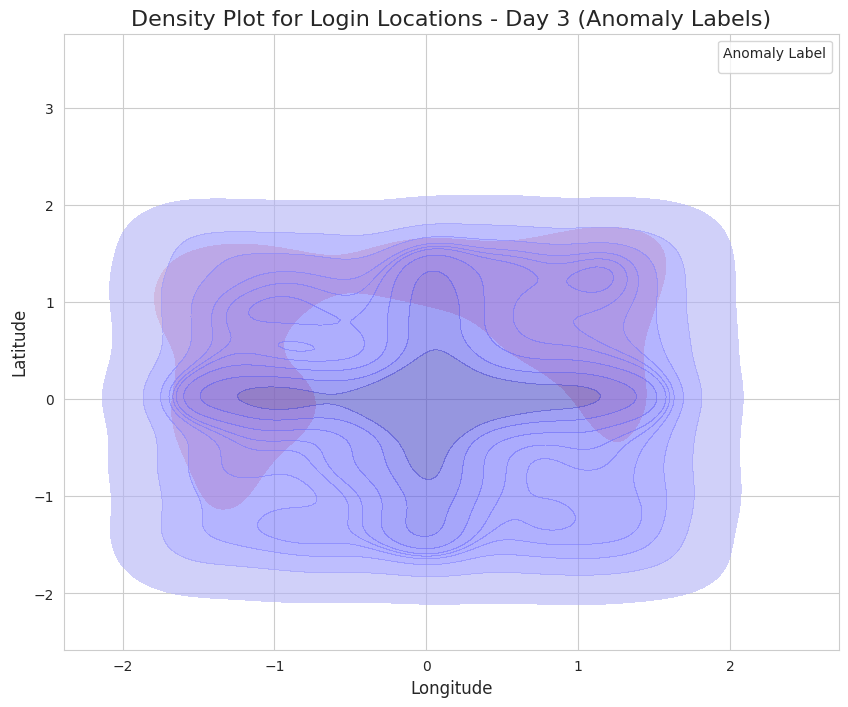

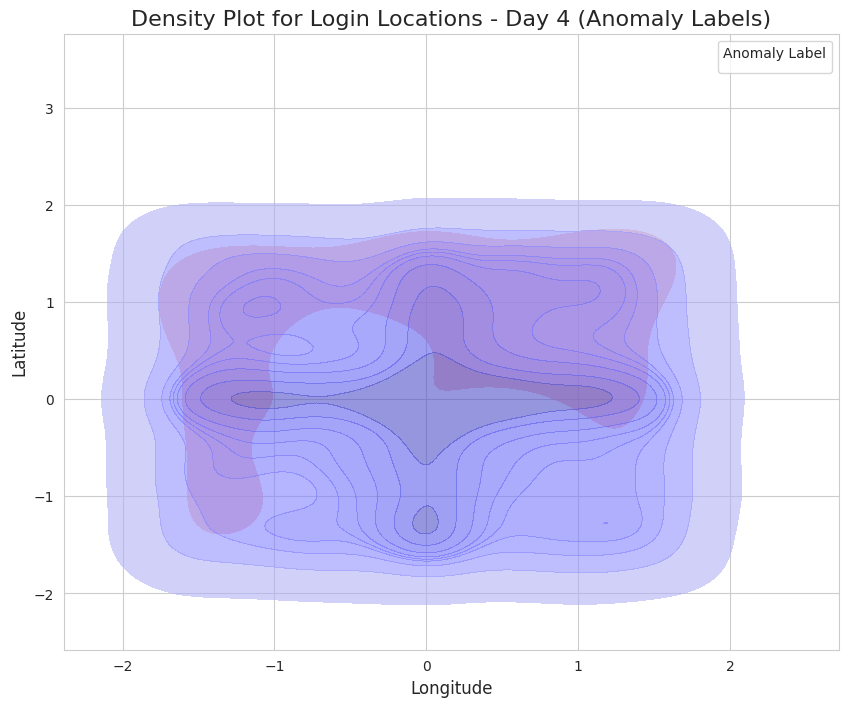

Generated density plots for geographical features with consistent scaling.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np

# Set the aesthetic style for the plots
sns.set_style('whitegrid')

# --- Ensure df_scaled and anomaly_label are defined for this cell ---
# Replicate preprocessing steps from previous cells
df_processed = df.drop(columns=['id', 'player_id'])

# Impute missing values
numerical_cols = df_processed.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='median')
df_processed[numerical_cols] = imputer.fit_transform(df_processed[numerical_cols])

# Scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)

# Apply Isolation Forest to get anomaly labels
model = IsolationForest(contamination='auto', random_state=42)
model.fit(df_scaled)
anomaly_labels = model.predict(df_scaled)
df_scaled['anomaly_label'] = anomaly_labels
# --- End of replicated code ---

# Identify login latitude and longitude columns
lat_cols = [col for col in df_scaled.columns if 'login_lat' in col]
lon_cols = [col for col in df_scaled.columns if 'login_lon' in col]

# Calculate consistent axis limits across all login lat/lon columns
x_lim = (df_scaled[lon_cols].min().min() - 0.1, df_scaled[lon_cols].max().max() + 0.1)
y_lim = (df_scaled[lat_cols].min().min() - 0.1, df_scaled[lat_cols].max().max() + 0.1)

# Iterate through each pair of login_lat and login_lon columns
for i in range(len(lat_cols)):
    lat_col = lat_cols[i]
    lon_col = lon_cols[i]
    day = i + 1

    plt.figure(figsize=(10, 8))
    # Use kdeplot to show density instead of scatterplot
    sns.kdeplot(
        x=lon_col,
        y=lat_col,
        hue='anomaly_label',
        palette={-1: 'red', 1: 'blue'}, # Red for anomalies, blue for normal
        data=df_scaled,
        fill=True, # Fill the density contours
        alpha=0.6, # Transparency for the filled areas
        levels=10, # Number of contour levels
        thresh=0.05 # Threshold for density contours
    )

    plt.title(f'Density Plot for Login Locations - Day {day} (Anomaly Labels)', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)

    # Set consistent axis limits
    plt.xlim(x_lim)
    plt.ylim(y_lim)

    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = []
    for label in labels:
        if label == '-1':
            new_labels.append('Anomaly')
        elif label == '1':
            new_labels.append('Normal')
        else:
            new_labels.append(label)

    plt.legend(handles, new_labels, title='Anomaly Label', loc='best')
    plt.grid(True)
    plt.show()

print("Generated density plots for geographical features with consistent scaling.")

## Preprocess Data for Anomaly Detection



In [7]:
df_processed = df.drop(columns=['id', 'player_id'])
print("Columns 'id' and 'player_id' dropped.")
print("Shape of DataFrame after dropping columns:", df_processed.shape)

Columns 'id' and 'player_id' dropped.
Shape of DataFrame after dropping columns: (9748, 122)


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify numerical columns (all columns remaining in df_processed are numerical)
numerical_cols = df_processed.select_dtypes(include=np.number).columns

# Impute missing values using the median for numerical columns
imputer = SimpleImputer(strategy='median')
df_processed[numerical_cols] = imputer.fit_transform(df_processed[numerical_cols])

print("Missing values after imputation:")
print(df_processed.isnull().sum().sum())

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)

print("\nShape of scaled DataFrame:", df_scaled.shape)
print("First 5 rows of scaled DataFrame:")
print(df_scaled.head())

Missing values after imputation:
0

Shape of scaled DataFrame: (9748, 122)
First 5 rows of scaled DataFrame:
   login_count_1  login_count_2  login_count_3  login_count_4  login_lat_1  \
0      -1.184390      -0.699474      -1.284495      -0.009434    -0.518566   
1       0.081296      -0.403703      -0.047708      -0.009434     1.437801   
2      -1.455645      -0.861623      -1.332266      -1.161224     0.237841   
3       0.952409       0.619021       0.573530       1.031644    -0.866631   
4      -0.357911       0.450548      -0.158471       0.372996    -1.407367   

   login_lon_1  login_lat_2  login_lon_2  login_lat_3  login_lon_3  ...  \
0     1.243813    -0.529235     1.238351    -0.566385     1.250877  ...   
1     0.237305     1.447007     0.248144     1.441816     0.245248  ...   
2     0.388019     0.243253     0.386137     0.247507     0.386786  ...   
3     1.755376    -0.873706     1.752040    -0.850080     1.762669  ...   
4     1.645513    -1.418503     1.632939    -1.

## Visualize Data Distribution After Preprocessing




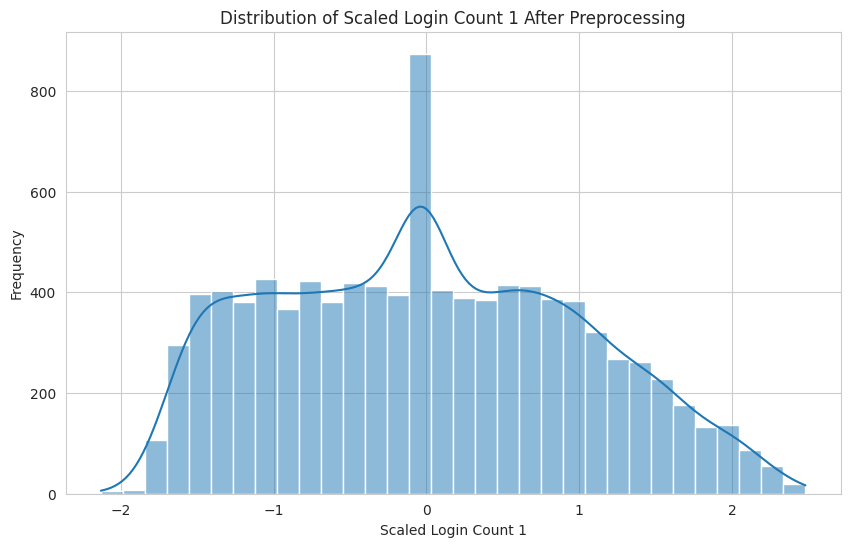

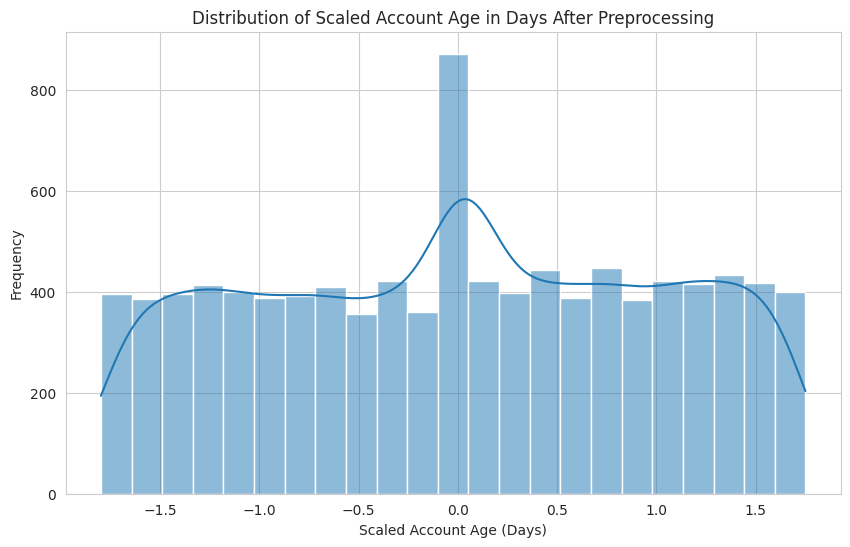

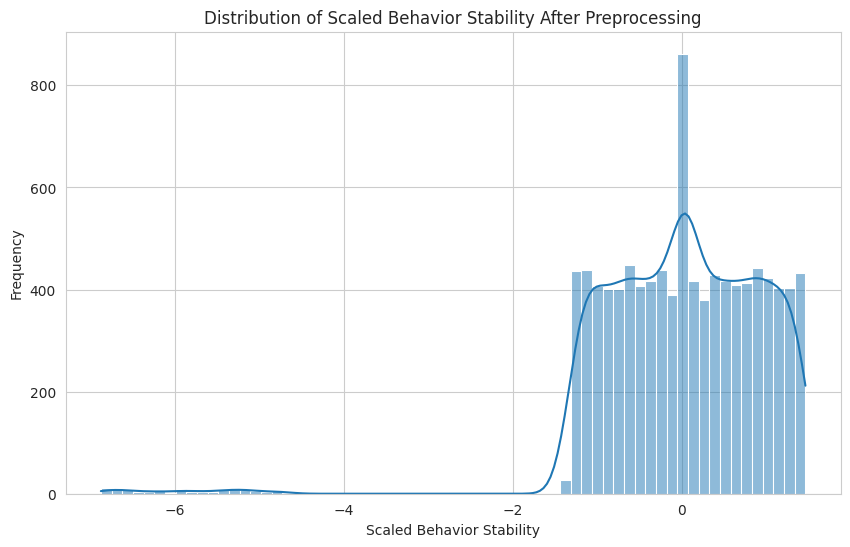

Histograms for login_count_1, account_age_days, and behavior_stability from df_scaled generated.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style('whitegrid')

# Create histograms for specified columns from df_scaled

# Histogram for login_count_1
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['login_count_1'], kde=True)
plt.title('Distribution of Scaled Login Count 1 After Preprocessing')
plt.xlabel('Scaled Login Count 1')
plt.ylabel('Frequency')
plt.show()

# Histogram for account_age_days
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['account_age_days'], kde=True)
plt.title('Distribution of Scaled Account Age in Days After Preprocessing')
plt.xlabel('Scaled Account Age (Days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for behavior_stability
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['behavior_stability'], kde=True)
plt.title('Distribution of Scaled Behavior Stability After Preprocessing')
plt.xlabel('Scaled Behavior Stability')
plt.ylabel('Frequency')
plt.show()

print("Histograms for login_count_1, account_age_days, and behavior_stability from df_scaled generated.")

## Apply Unsupervised Anomaly Detection Model



In [10]:
from sklearn.ensemble import IsolationForest

# Instantiate the IsolationForest model
# contamination='auto' lets the model estimate the proportion of anomalies
# random_state for reproducibility
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the scaled DataFrame
model.fit(df_scaled)

# Predict anomaly labels (-1 for outliers, 1 for inliers) using the original df_scaled
anomaly_labels = model.predict(df_scaled)

# Calculate anomaly scores (lower scores indicate higher likelihood of being an anomaly) using the original df_scaled
anomaly_scores = model.decision_function(df_scaled)

# Add anomaly labels and scores to the df_scaled DataFrame
df_scaled['anomaly_label'] = anomaly_labels
df_scaled['anomaly_score'] = anomaly_scores

print("Isolation Forest model applied.")
print("Anomaly labels and scores added to df_scaled.")
print("First 5 rows of df_scaled with anomaly predictions:")
print(df_scaled.head())

Isolation Forest model applied.
Anomaly labels and scores added to df_scaled.
First 5 rows of df_scaled with anomaly predictions:
   login_count_1  login_count_2  login_count_3  login_count_4  login_lat_1  \
0      -1.184390      -0.699474      -1.284495      -0.009434    -0.518566   
1       0.081296      -0.403703      -0.047708      -0.009434     1.437801   
2      -1.455645      -0.861623      -1.332266      -1.161224     0.237841   
3       0.952409       0.619021       0.573530       1.031644    -0.866631   
4      -0.357911       0.450548      -0.158471       0.372996    -1.407367   

   login_lon_1  login_lat_2  login_lon_2  login_lat_3  login_lon_3  ...  \
0     1.243813    -0.529235     1.238351    -0.566385     1.250877  ...   
1     0.237305     1.447007     0.248144     1.441816     0.245248  ...   
2     0.388019     0.243253     0.386137     0.247507     0.386786  ...   
3     1.755376    -0.873706     1.752040    -0.850080     1.762669  ...   
4     1.645513    -1.41850

## Dimensionality Reduction for Visualization





In [11]:
import umap
import matplotlib.pyplot as plt # Imported for potential future visualization, not directly used in this step.

# Exclude 'anomaly_label' and 'anomaly_score' columns for UMAP reduction
df_features_for_umap = df_scaled.drop(columns=['anomaly_label', 'anomaly_score'])

# Create a UMAP reducer object
# n_components=2 for 2D reduction
# random_state for reproducibility
reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the data
umap_embeddings = reducer.fit_transform(df_features_for_umap)

# Store these two new dimensions in df_scaled
df_scaled['umap_dim_1'] = umap_embeddings[:, 0]
df_scaled['umap_dim_2'] = umap_embeddings[:, 1]

print("UMAP dimensionality reduction applied. New dimensions added to df_scaled.")
print("First 5 rows of df_scaled with UMAP dimensions:")
print(df_scaled.head())

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP dimensionality reduction applied. New dimensions added to df_scaled.
First 5 rows of df_scaled with UMAP dimensions:
   login_count_1  login_count_2  login_count_3  login_count_4  login_lat_1  \
0      -1.184390      -0.699474      -1.284495      -0.009434    -0.518566   
1       0.081296      -0.403703      -0.047708      -0.009434     1.437801   
2      -1.455645      -0.861623      -1.332266      -1.161224     0.237841   
3       0.952409       0.619021       0.573530       1.031644    -0.866631   
4      -0.357911       0.450548      -0.158471       0.372996    -1.407367   

   login_lon_1  login_lat_2  login_lon_2  login_lat_3  login_lon_3  ...  \
0     1.243813    -0.529235     1.238351    -0.566385     1.250877  ...   
1     0.237305     1.447007     0.248144     1.441816     0.245248  ...   
2     0.388019     0.243253     0.386137     0.247507     0.386786  ...   
3     1.755376    -0.873706     1.752040    -0.850080     1.762669  ...   
4     1.645513    -1.418503     1.

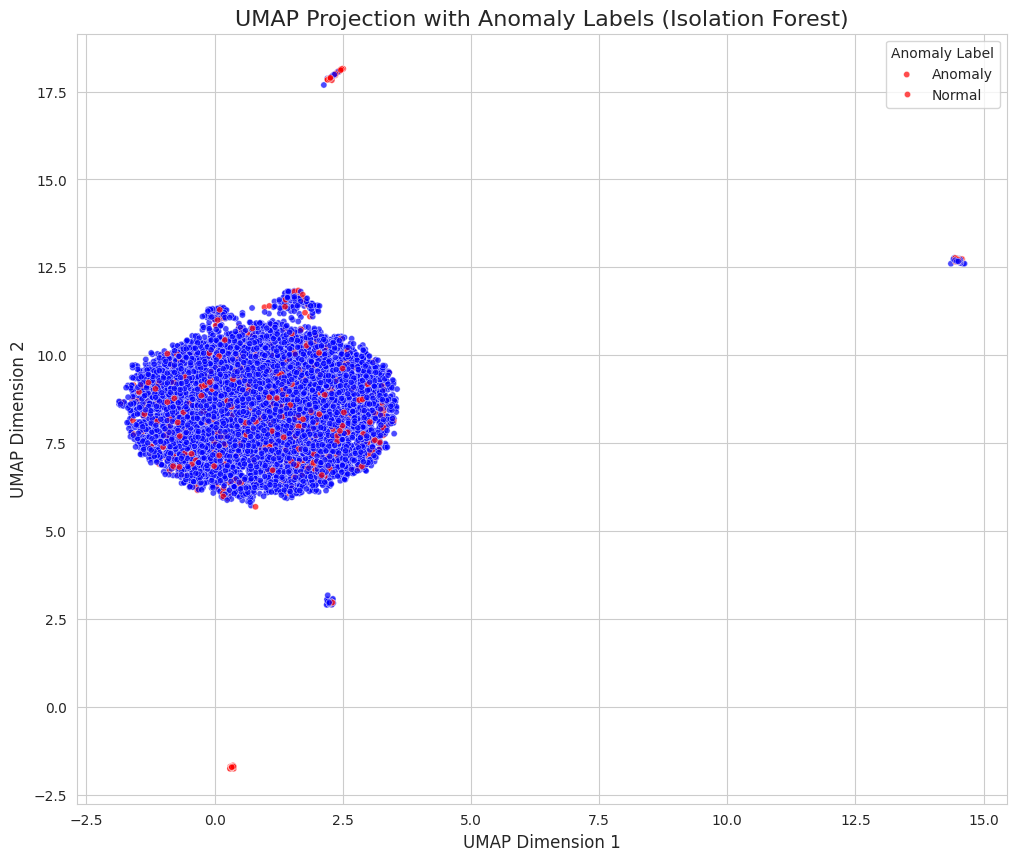

Scatter plot visualizing UMAP dimensions and anomaly labels generated.


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

plt.figure(figsize=(12, 10))

# Create a scatter plot of the UMAP dimensions
# Color points based on 'anomaly_label' (-1 for anomalies, 1 for normal)
sns.scatterplot(
    x='umap_dim_1',
    y='umap_dim_2',
    hue='anomaly_label',
    palette={-1: 'red', 1: 'blue'}, # Red for anomalies, blue for normal
    data=df_scaled,
    s=20, # Marker size
    alpha=0.7 # Transparency
)

plt.title('UMAP Projection with Anomaly Labels (Isolation Forest)', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.legend(title='Anomaly Label', loc='best', labels=['Anomaly', 'Normal'])
plt.grid(True)
plt.show()

print("Scatter plot visualizing UMAP dimensions and anomaly labels generated.")

## Apply Isolation Forest with Multiple Contamination Values



In [13]:
from sklearn.ensemble import IsolationForest

# Define a list of contamination values to test
contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Iterate through each contamination value
for contamination in contamination_values:
    print(f"Applying Isolation Forest with contamination: {contamination}")
    # Instantiate the IsolationForest model with the current contamination value
    model_multi = IsolationForest(contamination=contamination, random_state=42)

    # Fit the model to the feature DataFrame
    model_multi.fit(df_features_for_umap)

    # Predict anomaly labels and scores
    df_scaled[f'anomaly_label_{contamination}'] = model_multi.predict(df_features_for_umap)
    df_scaled[f'anomaly_score_{contamination}'] = model_multi.decision_function(df_features_for_umap)

print("Isolation Forest models applied for multiple contamination values.")
print("First 5 rows of df_scaled with new anomaly predictions:")
print(df_scaled.head())

Applying Isolation Forest with contamination: 0.1
Applying Isolation Forest with contamination: 0.2
Applying Isolation Forest with contamination: 0.3
Applying Isolation Forest with contamination: 0.4
Applying Isolation Forest with contamination: 0.5
Isolation Forest models applied for multiple contamination values.
First 5 rows of df_scaled with new anomaly predictions:
   login_count_1  login_count_2  login_count_3  login_count_4  login_lat_1  \
0      -1.184390      -0.699474      -1.284495      -0.009434    -0.518566   
1       0.081296      -0.403703      -0.047708      -0.009434     1.437801   
2      -1.455645      -0.861623      -1.332266      -1.161224     0.237841   
3       0.952409       0.619021       0.573530       1.031644    -0.866631   
4      -0.357911       0.450548      -0.158471       0.372996    -1.407367   

   login_lon_1  login_lat_2  login_lon_2  login_lat_3  login_lon_3  ...  \
0     1.243813    -0.529235     1.238351    -0.566385     1.250877  ...   
1     0.

## Visualize Anomalies for Each Contamination Level




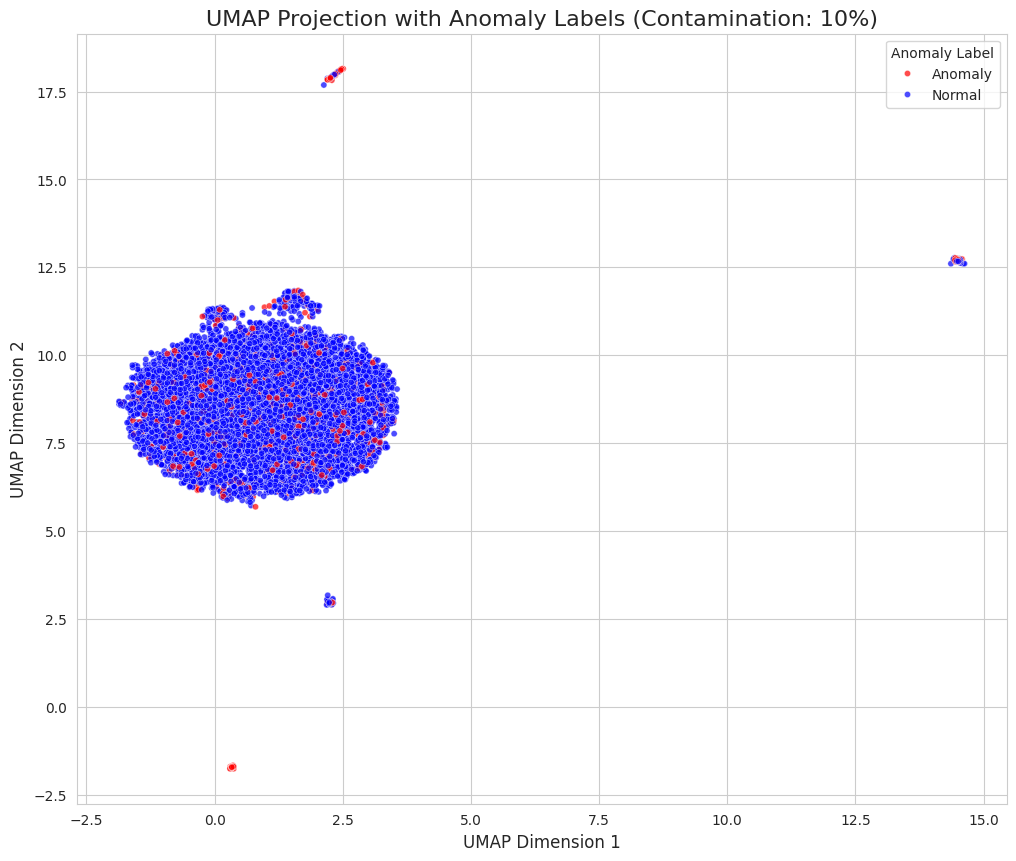

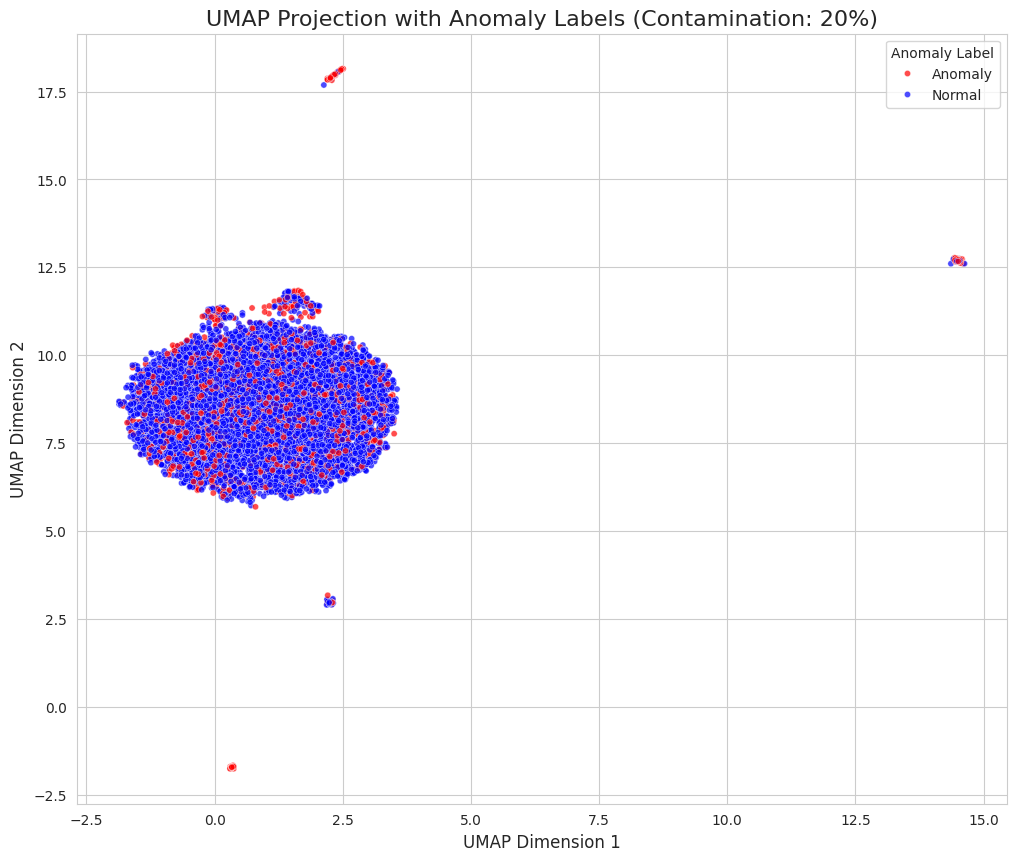

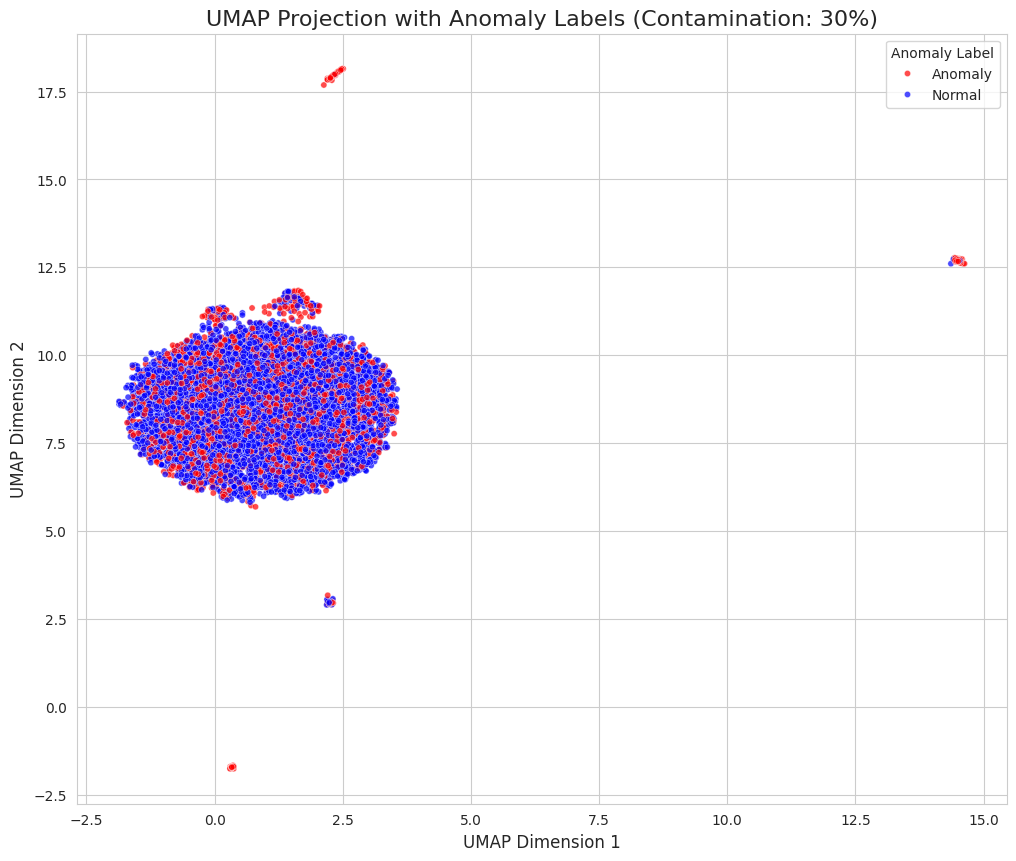

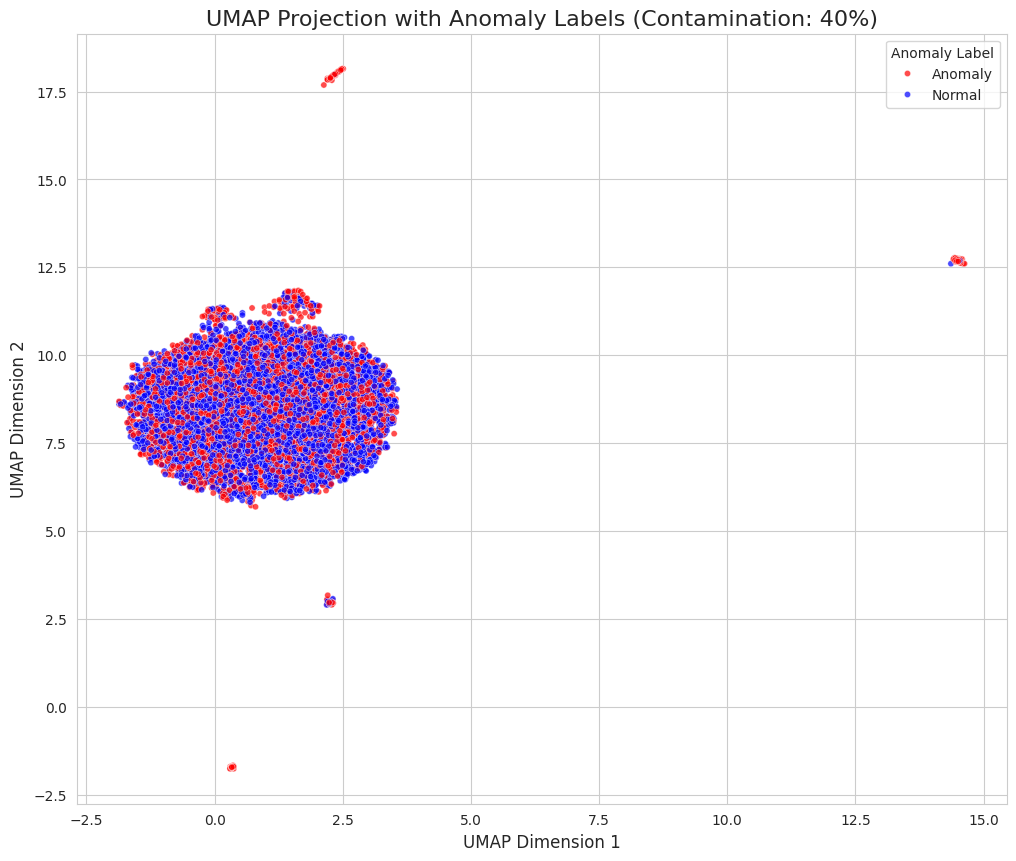

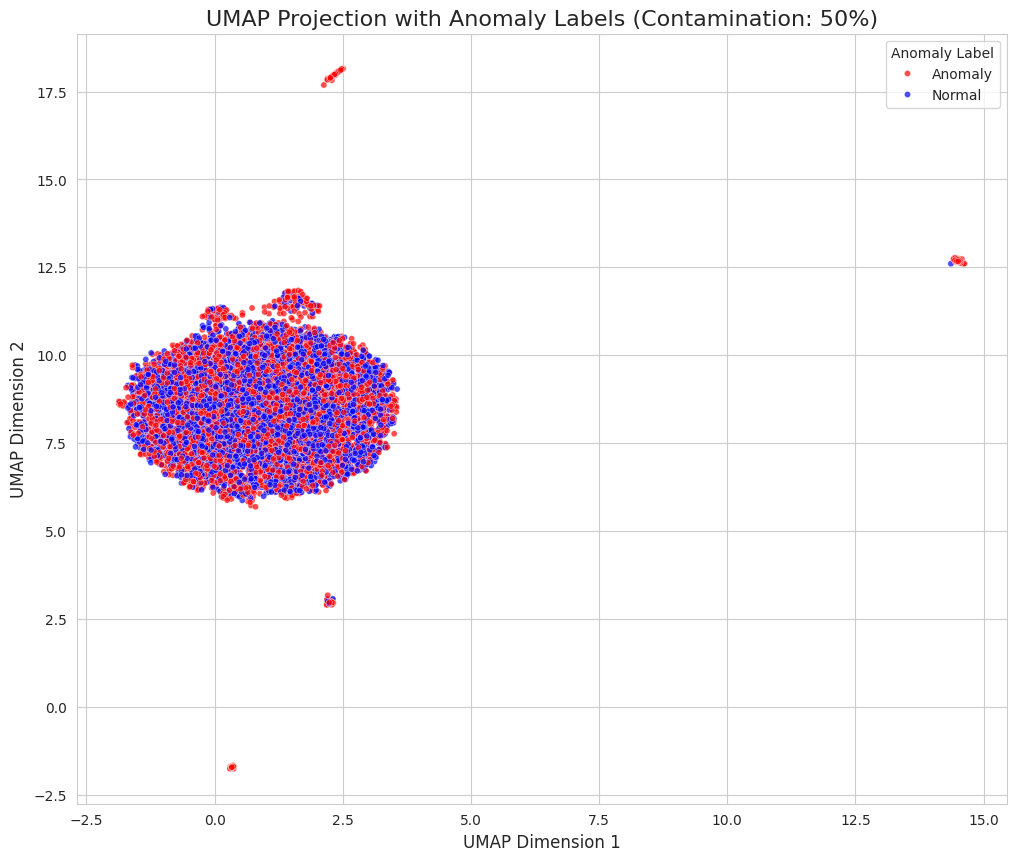

Generated UMAP scatter plots for each contamination level.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style is set for consistent plots
sns.set_style('whitegrid')

# Define the list of contamination values (re-using if not explicitly passed)
contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Iterate through each contamination value to generate separate plots
for contamination in contamination_values:
    plt.figure(figsize=(12, 10))

    # Get the column name for the current anomaly label
    anomaly_label_col = f'anomaly_label_{contamination}'

    # Create a scatter plot of the UMAP dimensions, colored by the current anomaly label
    sns.scatterplot(
        x='umap_dim_1',
        y='umap_dim_2',
        hue=anomaly_label_col,
        palette={-1: 'red', 1: 'blue'}, # Red for anomalies, blue for normal
        data=df_scaled,
        s=20, # Marker size
        alpha=0.7 # Transparency
    )

    # Set plot title and labels
    plt.title(f'UMAP Projection with Anomaly Labels (Contamination: {contamination*100:.0f}%)', fontsize=16)
    plt.xlabel('UMAP Dimension 1', fontsize=12)
    plt.ylabel('UMAP Dimension 2', fontsize=12)

    # Customize legend
    # Create custom handles for the legend to show 'Anomaly' and 'Normal'
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = []
    for label in labels:
        if label == '-1':
            new_labels.append('Anomaly')
        elif label == '1':
            new_labels.append('Normal')
        else:
            new_labels.append(label)

    plt.legend(handles, new_labels, title='Anomaly Label', loc='best')

    plt.grid(True)
    plt.show()

print("Generated UMAP scatter plots for each contamination level.")

In [15]:
# Extract the 'id' column from the original DataFrame for submission
submission_ids = df[['id']]

# Define the list of contamination values (re-using if not explicitly passed)
contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Define the mapping for anomaly labels: -1 (anomaly) -> 1, 1 (normal) -> 0
anomaly_label_mapping = {-1: 1, 1: 0}

# Iterate through each contamination value to generate submission files
for contamination in contamination_values:
    # Get the column name for the current anomaly label
    anomaly_label_col = f'anomaly_label_{contamination}'

    # Create a DataFrame for submission for the current contamination level
    submission_df = submission_ids.copy()
    # Apply the mapping to change anomaly labels
    submission_df['anomaly'] = df_scaled[anomaly_label_col].map(anomaly_label_mapping)

    # Save the submission DataFrame to a CSV file
    file_name = f'submission_contamination_{contamination}.csv'
    submission_df.to_csv(file_name, index=False)

    print(f"Submission file for contamination {contamination*100:.0f}% generated: {file_name}")

print("All submission files generated successfully.")

Submission file for contamination 10% generated: submission_contamination_0.1.csv
Submission file for contamination 20% generated: submission_contamination_0.2.csv
Submission file for contamination 30% generated: submission_contamination_0.3.csv
Submission file for contamination 40% generated: submission_contamination_0.4.csv
Submission file for contamination 50% generated: submission_contamination_0.5.csv
All submission files generated successfully.
